# Прогноз оттока клиентов телекоммуникационной компании

Телекоммуникационная компания хочет научиться прогнозировать отток клиентов на основе исторических данных о поведении клиентов и их договоров. Необходимо построить модель, способную предсказывать, уйдёт ли клиент в ближайшее время, чтобы вовремя предложить ему выгодные условия и сохранить его.

Цель исследования: построить модель с метрикой ROC AUC не менее 0.85 на тестовой выборке.

<h1>План исследования<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Импорты" data-toc-modified-id="Импорты-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорты</a></span></li><li><span><a href="#Вспомогательные-функции" data-toc-modified-id="Вспомогательные-функции-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Вспомогательные функции</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Первичная-проверка-данных" data-toc-modified-id="Первичная-проверка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Первичная проверка данных</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Обработка-данных" data-toc-modified-id="Обработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обработка данных</a></span><ul class="toc-item"><li><span><a href="#Предобработка" data-toc-modified-id="Предобработка-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Предобработка</a></span></li><li><span><a href="#Обработка" data-toc-modified-id="Обработка-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обработка</a></span><ul class="toc-item"><li><span><a href="#Обработка-contract_new" data-toc-modified-id="Обработка-contract_new-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Обработка <strong>contract_new</strong></a></span><ul class="toc-item"><li><span><a href="#Создание-целевого-признака-active_contract" data-toc-modified-id="Создание-целевого-признака-active_contract-2.2.1.1"><span class="toc-item-num">2.2.1.1&nbsp;&nbsp;</span>Создание целевого признака <code>active_contract</code></a></span></li><li><span><a href="#Создание-признака-duration_contract" data-toc-modified-id="Создание-признака-duration_contract-2.2.1.2"><span class="toc-item-num">2.2.1.2&nbsp;&nbsp;</span>Создание признака <code>duration_contract</code></a></span></li></ul></li><li><span><a href="#Обработка-personal_new" data-toc-modified-id="Обработка-personal_new-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Обработка <strong>personal_new</strong></a></span></li><li><span><a href="#Обработка-internet_new" data-toc-modified-id="Обработка-internet_new-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Обработка <strong>internet_new</strong></a></span></li></ul></li><li><span><a href="#Объединение-данных" data-toc-modified-id="Объединение-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Объединение данных</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Распределение-целевой-переменной-active_contract" data-toc-modified-id="Распределение-целевой-переменной-active_contract-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Распределение целевой переменной <code>active_contract</code></a></span></li><li><span><a href="#Анализ-числовых-признаков" data-toc-modified-id="Анализ-числовых-признаков-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Анализ числовых признаков</a></span></li><li><span><a href="#Корреляционный-анализ" data-toc-modified-id="Корреляционный-анализ-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Корреляционный анализ</a></span></li><li><span><a href="#Сравнение-ушедших-и-оставшихся-клиентов" data-toc-modified-id="Сравнение-ушедших-и-оставшихся-клиентов-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Сравнение ушедших и оставшихся клиентов</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Подготовка-и-обучение-моделей" data-toc-modified-id="Подготовка-и-обучение-моделей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Подготовка и обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Разделение-данных-на-обучающую-и-тестовую-выборки" data-toc-modified-id="Разделение-данных-на-обучающую-и-тестовую-выборки-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Разделение данных на обучающую и тестовую выборки</a></span></li><li><span><a href="#Обработка-дисбаланса-классов" data-toc-modified-id="Обработка-дисбаланса-классов-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Обработка дисбаланса классов</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#RandomForest" data-toc-modified-id="RandomForest-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>RandomForest</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-4.4.3"><span class="toc-item-num">4.4.3&nbsp;&nbsp;</span>CatBoost</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-лучшей-модели" data-toc-modified-id="Тестирование-лучшей-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование лучшей модели</a></span><ul class="toc-item"><li><span><a href="#Проверим-целевые-метрики" data-toc-modified-id="Проверим-целевые-метрики-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Проверим целевые метрики</a></span></li><li><span><a href="#Изучим-матрицу-ошибок" data-toc-modified-id="Изучим-матрицу-ошибок-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Изучим матрицу ошибок</a></span></li><li><span><a href="#Определим-важность-признаков" data-toc-modified-id="Определим-важность-признаков-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Определим важность признаков</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

## Подготовка

### Импорты

In [1]:
!pip install --upgrade phik
!pip install --upgrade scikit-learn 

**!НУЖНО ПЕРЕЗАПУСТИТЬ ЯДРО ПОСЛЕ ОБНОВЛЕНИЯ!**

In [2]:
# Импорт библиотек
import phik
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import warnings

from catboost import CatBoostClassifier
from phik import phik_matrix
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, ParameterGrid
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MaxAbsScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (roc_auc_score, roc_curve, auc, accuracy_score, 
                             confusion_matrix, ConfusionMatrixDisplay, classification_report)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from tqdm.notebook import tqdm 

warnings.filterwarnings('ignore')

# Установка глобальной переменной для фиксации рандома
RANDOM_STATE = 121124  

### Вспомогательные функции

<div class="alert alert-success">
<b>✔️ Комментарий ревьювера:</b> Здорово, что подготовил функции для подготовки данных и обучения моделей! 
    
Это делает код лаконичнее 👍

</div>

In [3]:
def preprocess_columns(df):
    """
    Приводит названия столбцов к нижнему регистру с подчеркиваниями
    и переименовывает 'customerID' или 'customer_Id' в 'customer_id'
    """
    df.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', col).lower() for col in df.columns]
    df.rename(columns={'customer_i_d': 'customer_id', 'customerid': 'customer_id'}, inplace=True)
    return df

def fill_missing_values(df):
    """
    Заполняет пропущенные значения: для числовых признаков - нулями, для категориальных - строкой 'NoValue'
    """
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = df[column].fillna('NoValue')
        else:
            df[column] = df[column].fillna(0)
    return df

def convert_to_datetime(df, columns):
    """
    Преобразует указанные столбцы в формат datetime
    """
    for col in columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')
    return df

    
def get_preprocessor(model_type):
    """
    Возвращает ColumnTransformer с соответствующими преобразованиями для числовых и категориальных признаков
    """
    if model_type == 'linear':
        numeric_transformer = Pipeline(steps=[
            ('scaler', StandardScaler())
        ])
        categorical_transformer = Pipeline(steps=[
            ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'))
        ])
    elif model_type == 'other':
        numeric_transformer = Pipeline(steps=[
            ('scaler', MaxAbsScaler())
        ])
        categorical_transformer = Pipeline(steps=[
            ('ord', OrdinalEncoder())
        ])
    else:
        raise ValueError("model_type должен быть 'linear' или 'other'")
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, [col for col in numeric_features if col in selected_features]),
            ('cat', categorical_transformer, [col for col in selected_features if col in categorical_features])
        ],
        remainder='drop',
        verbose_feature_names_out=False
    )
    return preprocessor

def compare_distributions(df, feature, target='active_contract'):
    """
    Строит две гистограммы на одном графике: 
    для значений признака feature при target = 0 и target = 1.
    
    Parameters:
    - df: pandas.DataFrame - входной датасет
    - feature: str - название столбца признака
    - target: str - название целевого столбца (по умолчанию 'active_contract')
    """
    plt.figure(figsize=(10, 6))
    
    # Гистограмма для клиентов, которые ушли (target == 0)
    sns.histplot(df[df[target] == 0][feature], 
                 label='Остались', 
                 color='green', 
                 kde=True, 
                 alpha=0.6)
    
    # Гистограмма для клиентов, которые остались (target == 1)
    sns.histplot(df[df[target] == 1][feature], 
                 label='Ушли', 
                 color='blue', 
                 kde=True, 
                 alpha=0.6)
    
    plt.title(f'Сравнение распределений {feature}')
    plt.xlabel(feature.replace('_', ' ').title())
    plt.ylabel('Частота')
    plt.legend()
    plt.grid(True)
    plt.show()


def compare_categorical(df, feature, target='active_contract'):
    """
    Строит групповую столбчатую диаграмму для категориального признака,
    показывая распределение для каждой категории по целевому признаку.

    Parameters:
    - df: pandas.DataFrame - входной датасет
    - feature: str - название категориального признака
    - target: str - название целевого признака (по умолчанию 'active_contract')
    """
    # Подготовка данных
    grouped = df.groupby([feature, target]).size().reset_index(name='count')
    pivot_table = grouped.pivot(index=feature, columns=target, values='count').fillna(0)
    pivot_table = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100  # Преобразуем в проценты

    # Построение диаграммы
    pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis', alpha=0.85)
    plt.title(f'Распределение {feature.replace("_", " ").title()} по статусу контракта')
    plt.ylabel('Процент')
    plt.xlabel(feature.replace('_', ' ').title())
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Статус контракта', labels=[ 'Остались','Ушли'])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
# Функция для построения гистограмм
def plot_histograms_by_target(df, feature, target='active_contract'):
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=feature, hue=target, multiple='stack', palette='viridis')
    plt.title(f'Распределение {feature} по статусу контракта')
    plt.show()

### Загрузка данных

In [4]:
# Загрузка данных
contract_new = pd.read_csv('/datasets/contract_new.csv')
personal_new = pd.read_csv('/datasets/personal_new.csv')
internet_new = pd.read_csv('/datasets/internet_new.csv')
phone_new = pd.read_csv('/datasets/phone_new.csv')

### Первичная проверка данных

In [5]:
display(contract_new.head())
contract_new.info()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


- У `BeginDate` и `EndDate` тип данных *object*. Позже приветем их к типу datetime, заменив **No** в `EndDate` на дату выгрузки.
- У `TotalCharges` тип данных так же *object*, нужно привести его к численному.

In [6]:
display(personal_new.head())
personal_new.info()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


Признак `SeniorCitizen` имеет числовой тип, хотя является категориальным, для корректной обработки пропусков приведем его к типу object.

In [7]:
display(internet_new.head())
internet_new.info()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


Строк в этом датасете меньше, очевидно, указаны только пользователи, пользующиеся услугами интернета. Нужно будет учесть это при объединении таблиц.

In [8]:
display(phone_new.head())
phone_new.info()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


- Аналогично  указаны только пользователи, пользующиеся услугами телефонии. 
- Важно учесть, что признак не бинарный - у пользователя может быть одна линия, несколько, или не быть вовсе.

### Выводы
- Данные были загружены без ошибок
- Названия столбцов следует привести к нижнему регистру
- Столбцы с датами нужно привести к формату *datetime*, `TotalCharges` к *object*.
- Целевой признак получим из столбца `EndDate`

<div class="alert alert-success">
<b>✔️ Комментарий ревьювера:</b> Предварительный анализ данных выполнен успешно! 
    
Видно, что потребуется дальнейшая предобработка.
    
</div>

## Обработка данных 

### Предобработка

Приведем названия столбцов к нижнему регистру

In [9]:
contract_new = preprocess_columns(contract_new)
contract_new

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,2035.2
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7430.4
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,325.6
7041,8361-LTMKD,2019-07-01,No,Month-to-month,Yes,Mailed check,74.40,520.8


In [10]:
personal_new = preprocess_columns(personal_new)
personal_new

,customer_id,gender,senior_citizen,partner,dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


In [11]:
internet_new = preprocess_columns(internet_new)
internet_new

,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_t_v,streaming_movies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...
5512,6840-RESVB,DSL,Yes,No,Yes,Yes,Yes,Yes
5513,2234-XADUH,Fiber optic,No,Yes,Yes,No,Yes,Yes
5514,4801-JZAZL,DSL,Yes,No,No,No,No,No
5515,8361-LTMKD,Fiber optic,No,No,No,No,No,No


In [12]:
phone_new = preprocess_columns(phone_new)
phone_new

,customer_id,multiple_lines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
...,...,...
6356,2569-WGERO,No
6357,6840-RESVB,Yes
6358,2234-XADUH,Yes
6359,8361-LTMKD,Yes


### Обработка

#### Обработка **contract_new**

In [13]:
#Приведем total_charges к численному типу
contract_new['total_charges'] = pd.to_numeric(contract_new['total_charges'], errors='coerce')
contract_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7032 non-null   float64
dtypes: float64(2), object(6)
memory usage: 440.3+ KB


In [14]:
contract_new[contract_new['total_charges'].isnull()] #Изучим пропуски

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,NaN
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,NaN
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,NaN
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,NaN
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,NaN
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,NaN
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,NaN
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,NaN
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,NaN


<div class="alert alert-success">
<b>✔️ Комментарий ревьювера:</b> Хорошо, что обратил внимание на пустые строки в признаке TotalCharges!
    
Как рекомендация, такие пропуски можно заменить месячными значениями платежей.
    
</div>

Пропуски в данных о сумме оплаты только у абонентов, начавших пользоваться услугами в месяц выгрузки, смело заполним их нулями.


In [15]:
contract_new['total_charges'] = contract_new['total_charges'].fillna(0)
#Убедимся, что пропусков не осталось
print("Пропусков в total_charges", contract_new['total_charges'].isnull().sum() )

Пропусков в total_charges 0


In [16]:
#Приведем данные к нужным типам
contract_new['total_charges'] = pd.to_numeric(contract_new['total_charges'], errors='coerce')
contract_new['total_charges'] = contract_new['total_charges'].fillna(0)

##### Создание целевого признака `active_contract`

In [17]:
#Преобразуем end_date в признак active_contract
contract_new['active_contract'] = contract_new['end_date'].apply(lambda x: 0 if x == 'No' else 1)

##### Создание признака `duration_contract`

In [18]:
#Замена 'No' в end_date на дату '2020-02-01'
contract_new['end_date'] = contract_new['end_date'].replace({'No': '2020-02-01'})

#Преобразование дат в datetime
contract_new = convert_to_datetime(contract_new, ['begin_date', 'end_date'])

#Вычисление duration_contract
contract_new['duration_contract'] = (contract_new['end_date'] - contract_new['begin_date']).dt.days

#Удаление ненужных столбцов
contract_new.drop(['begin_date', 'end_date'], axis=1, inplace=True)
contract_new.head()

,customer_id,type,paperless_billing,payment_method,monthly_charges,total_charges,active_contract,duration_contract
0,7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,31.04,0,31
1,5575-GNVDE,One year,No,Mailed check,56.95,2071.84,0,1036
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,226.17,0,123
3,7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1960.60,0,1371
4,9237-HQITU,Month-to-month,Yes,Electronic check,70.70,353.50,0,153


#### Обработка **personal_new**

In [19]:
#Преобразуем тип senior_citizen для корректной обработки пропусков
personal_new['senior_citizen'] = personal_new['senior_citizen'].map({0: 'No', 1: 'Yes'})
personal_new.head()

,customer_id,gender,senior_citizen,partner,dependents
0,7590-VHVEG,Female,No,Yes,No
1,5575-GNVDE,Male,No,No,No
2,3668-QPYBK,Male,No,No,No
3,7795-CFOCW,Male,No,No,No
4,9237-HQITU,Female,No,No,No


#### Обработка **internet_new**

In [20]:
#Переименование столбца 'streaming_t_v' в 'streaming_tv'
internet_new.rename(columns={'streaming_t_v': 'streaming_tv'}, inplace=True)
internet_new.head()

,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


### Объединение данных
Объединим все данные в одну таблицу.

In [21]:
#Объединение данных
total_new = personal_new.merge(contract_new, on='customer_id', how='left')
total_new = total_new.merge(internet_new, on='customer_id', how='left')
total_new = total_new.merge(phone_new, on='customer_id', how='left')

#Заполнение пропущенных значений
total_new = fill_missing_values(total_new)

#Приведение типов данных
total_new['total_charges'] = total_new['total_charges'].astype(float)
total_new['monthly_charges'] = total_new['monthly_charges'].astype(float)
total_new['duration_contract'] = total_new['duration_contract'].astype(int)
total_new['active_contract'] = total_new['active_contract'].astype(int)
total_new

,customer_id,gender,senior_citizen,partner,dependents,type,paperless_billing,payment_method,monthly_charges,total_charges,active_contract,duration_contract,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,7590-VHVEG,Female,No,Yes,No,Month-to-month,Yes,Electronic check,29.85,31.04,0,31,DSL,No,Yes,No,No,No,No,NoValue
1,5575-GNVDE,Male,No,No,No,One year,No,Mailed check,56.95,2071.84,0,1036,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,Male,No,No,No,Month-to-month,Yes,Mailed check,53.85,226.17,0,123,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,Male,No,No,No,One year,No,Bank transfer (automatic),42.30,1960.60,0,1371,DSL,Yes,No,Yes,Yes,No,No,NoValue
4,9237-HQITU,Female,No,No,No,Month-to-month,Yes,Electronic check,70.70,353.50,0,153,Fiber optic,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,One year,Yes,Mailed check,84.80,2035.20,0,730,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes
7039,2234-XADUH,Female,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7430.40,0,2191,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes
7040,4801-JZAZL,Female,No,Yes,Yes,Month-to-month,Yes,Electronic check,29.60,325.60,0,337,DSL,Yes,No,No,No,No,No,NoValue
7041,8361-LTMKD,Male,Yes,Yes,No,Month-to-month,Yes,Mailed check,74.40,520.80,0,215,Fiber optic,No,No,No,No,No,No,Yes


### Выводы

- Привели названия столбцов к нижнему регистру
- Привели данные к нужному типу
- Обработали пропуски корректными и маркерными значениями
- Создали целевой признак `active_contract`
- Создали признак `duration_contract`
- Объединили данные в общую таблицу


## Исследовательский анализ данных 

### Распределение целевой переменной `active_contract`
Изучим распределение целевого признака.

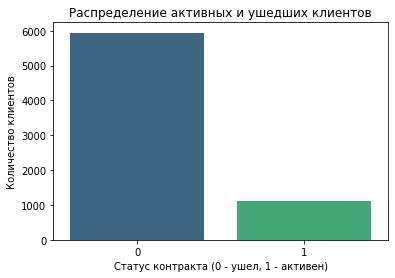

Процент ушедших клиентов: 84.37%
Процент активных клиентов: 15.63%


In [22]:
#Распределение целевой переменной
sns.countplot(data=total_new, x='active_contract', palette='viridis')
plt.title('Распределение активных и ушедших клиентов')
plt.xlabel('Статус контракта (0 - ушел, 1 - активен)')
plt.ylabel('Количество клиентов')
plt.show()

#Вывод процентного соотношения
active_counts = total_new['active_contract'].value_counts(normalize=True) * 100
print(f"Процент ушедших клиентов: {active_counts[0]:.2f}%")
print(f"Процент активных клиентов: {active_counts[1]:.2f}%")



- Доля ушедших клиентов составляет 84.37%, активных - 15.63%.
- Наблюдается дисбаланс классов, что необходимо учесть при обучении моделей.

### Анализ числовых признаков

Изучим распределение числовых признаков.

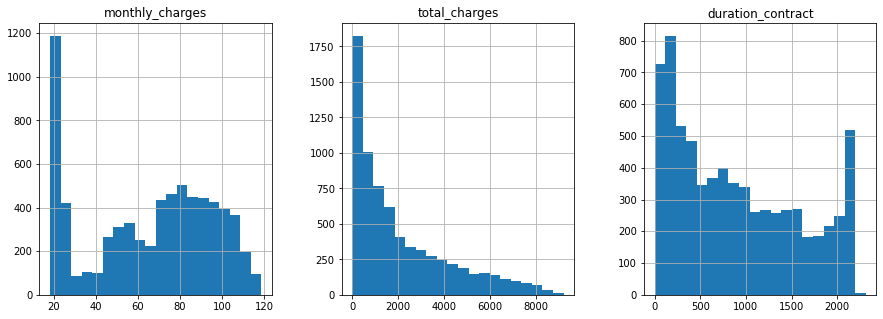

In [23]:
#Список числовых признаков
numeric_features = ['monthly_charges', 'total_charges', 'duration_contract']

#Гистограммы числовых признаков
total_new[numeric_features].hist(bins=20, figsize=(15, 5), layout=(1, 3))
plt.show()

- Распределение `monthly_charges` имеет правосторонний характер.
- `total_charges` также смещен вправо.
- `duration_contract` показывает, что многие клиенты имеют контракты длительностью до 500 дней.

### Корреляционный анализ

Проверим кореляцию 

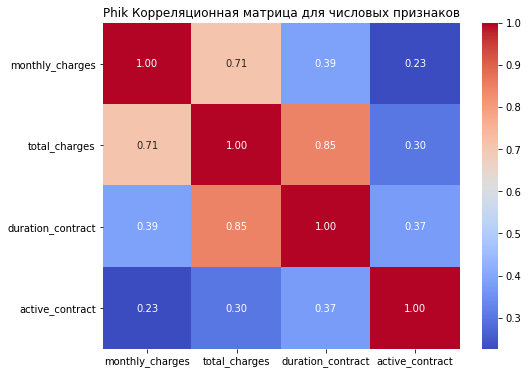

In [24]:
#Матрица корреляции
#Выбор только числовых признаков вместе с целевой переменной
numeric_features = ['monthly_charges', 'total_charges', 'duration_contract', 'active_contract']

#Вычисление матрицы корреляций Phik
phik_corr_numeric = total_new[numeric_features].phik_matrix(interval_cols=['monthly_charges', 'total_charges', 'duration_contract'])

#Отображение матрицы корреляций
plt.figure(figsize=(8, 6))
sns.heatmap(phik_corr_numeric, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Phik Корреляционная матрица для числовых признаков')
plt.show()

interval columns not set, guessing: ['monthly_charges', 'total_charges', 'active_contract', 'duration_contract']


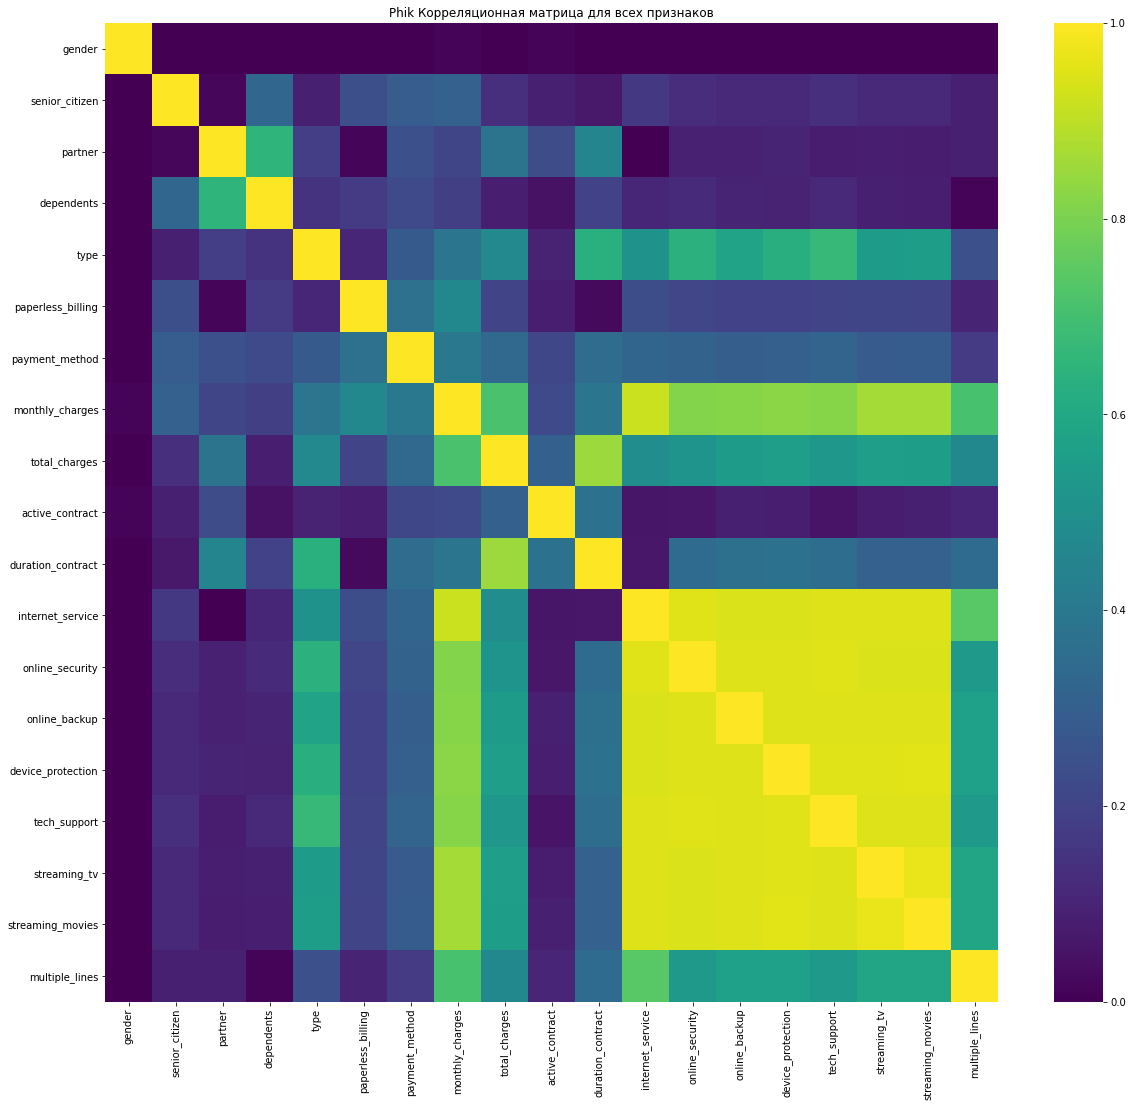

In [25]:
#Выбор всех признаков, исключая 'customer_id'
all_features = total_new.drop(['customer_id'], axis=1)

#Вычисление матрицы корреляций Phik
phik_corr_all = all_features.phik_matrix()

#Отображение матрицы корреляций
plt.figure(figsize=(20, 18))
sns.heatmap(phik_corr_all, annot=False, cmap='viridis')
plt.title('Phik Корреляционная матрица для всех признаков')
plt.show()




Видно, что признаки `internet_service`, `online_security`, `online_backup`, `device_protection`, `tech_support`, `streaming_tv` и `streaming_movies` все имеют высокую корреляцию друг с другом. Оставим только тот, который больше всего коррелирует с целевым признаком

- Есть сильная положительная корреляция между `monthly_charges` и `total_charges`.
- Целевая переменная `active_contract` отрицательно коррелирует с `duration_contract` и `total_charges`, что указывает на то, что длительные контракты и большие суммы платежей связаны с меньшей вероятностью оттока.


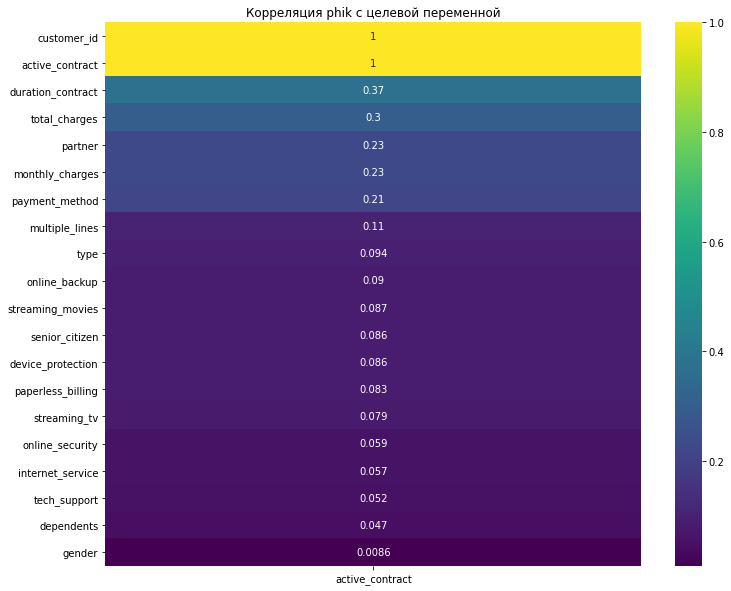

In [26]:
#Вычисление матрицы phik
phik_corr = total_new.phik_matrix(interval_cols=numeric_features)

#Визуализация матрицы phik
plt.figure(figsize=(12, 10))
sns.heatmap(phik_corr['active_contract'].sort_values(ascending=False).to_frame(), annot=True, cmap='viridis')
plt.title('Корреляция phik с целевой переменной')
plt.show()


In [45]:
#Отбор признаков для обучения
selected_features = [
    'senior_citizen',
    'partner',
    'dependents',
    'type',
    'paperless_billing',
    'payment_method',
    'monthly_charges',
    'total_charges',
    'duration_contract',
    'online_backup',
    'multiple_lines'
]


- Признаки `duration_contract`, `total_charges`, `monthly_charges` имеют слабую корреляцию с целевой переменной по phik.
- Категориальные признаки, такие как `partner`, `payment_method` и `multiple_lines` также показывают слабую корреляцию с оттоком клиентов.

### Сравнение ушедших и оставшихся клиентов

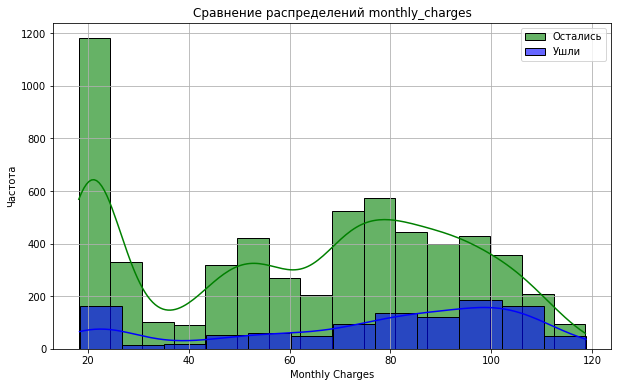

In [28]:
compare_distributions(total_new, 'monthly_charges')

- Клиенты с высокими ежемесячными платежами более склонны к оттоку. 
- Клиенты с низкими и средними платежами остаются с большей вероятностью

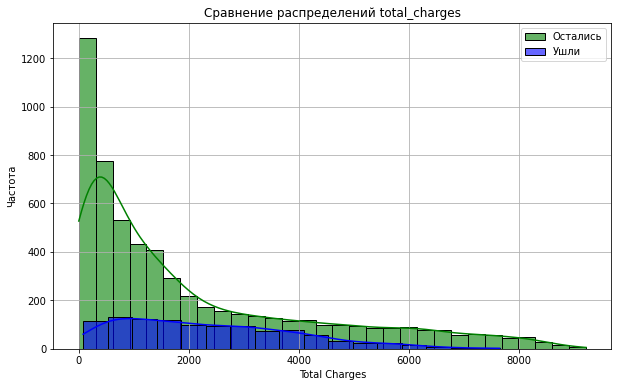

In [29]:
compare_distributions(total_new, 'total_charges')

- Доля ушедших клиентов резко уменьшается с увеличением total_charges.

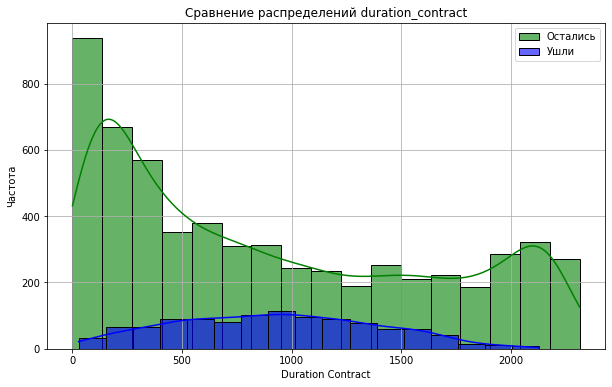

In [30]:
compare_distributions(total_new, 'duration_contract')

- Отток распределен по длительности контрактов достаточно равномерно с пиком на 1000 дней

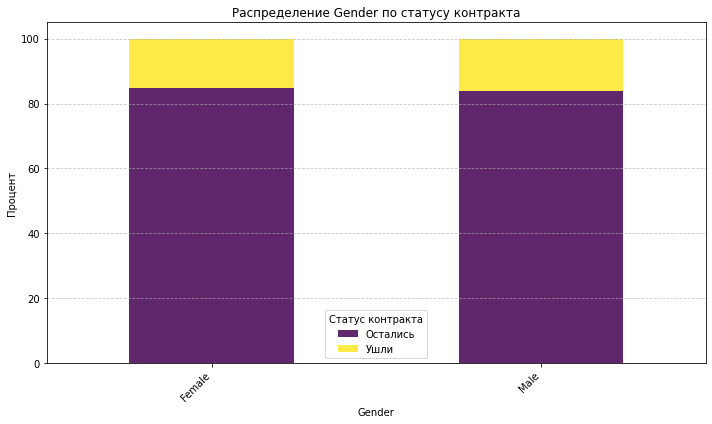

In [31]:
compare_categorical(total_new, 'gender')

- Пол не является значительным фактором оттока

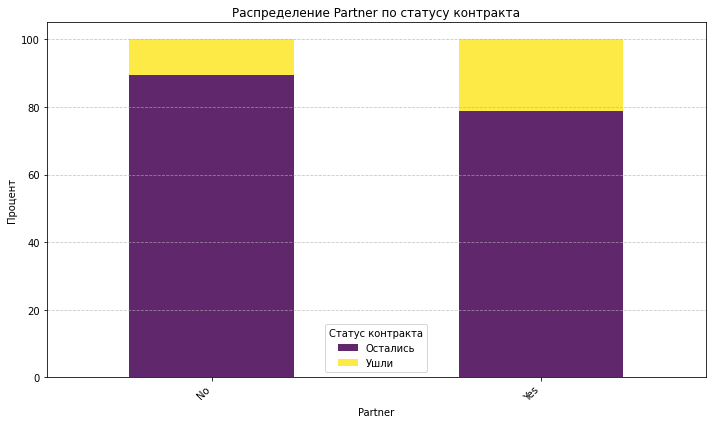

In [32]:
compare_categorical(total_new, 'partner') 

- Пользователи с партнерами уходят в 2 раза чаще, чем одинокие.

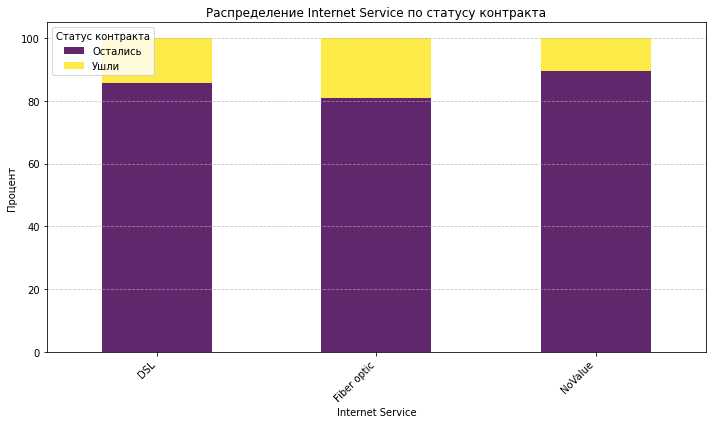

In [33]:
compare_categorical(total_new, 'internet_service')

- Процент оттока пользовательей оптического интернета выше, чем у остальных. Стоит обратить внимание на проблемы с услугой.

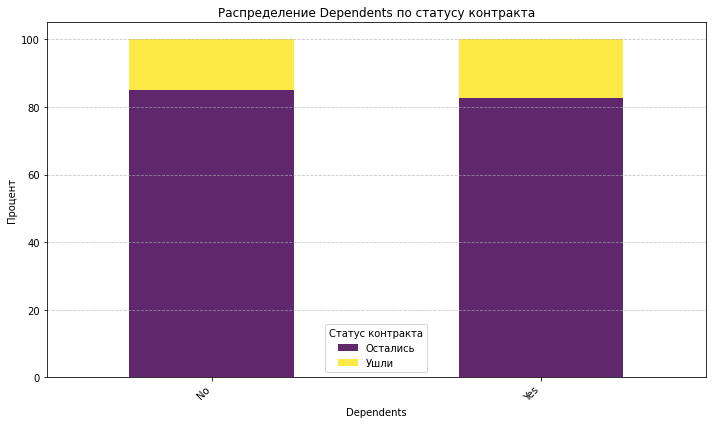

In [34]:
compare_categorical(total_new, 'dependents')

- Процент оттока пользователей с иждевенцами незначительно выше.

Сравнение для столбца: type


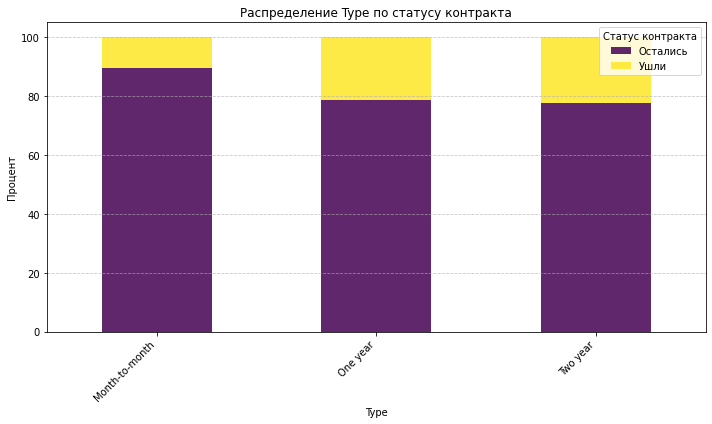

Сравнение для столбца: paperless_billing


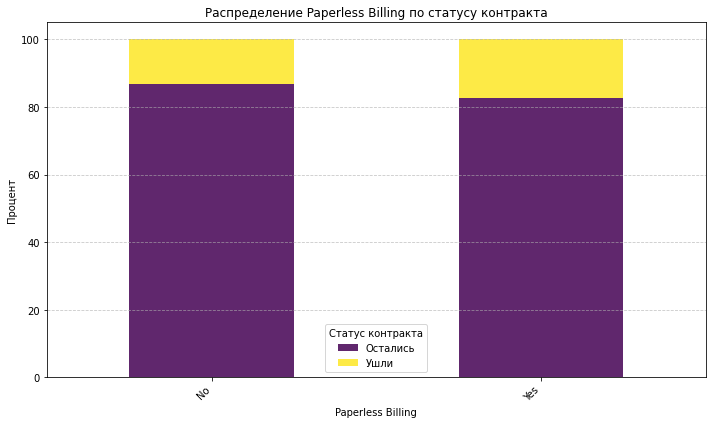

Сравнение для столбца: payment_method


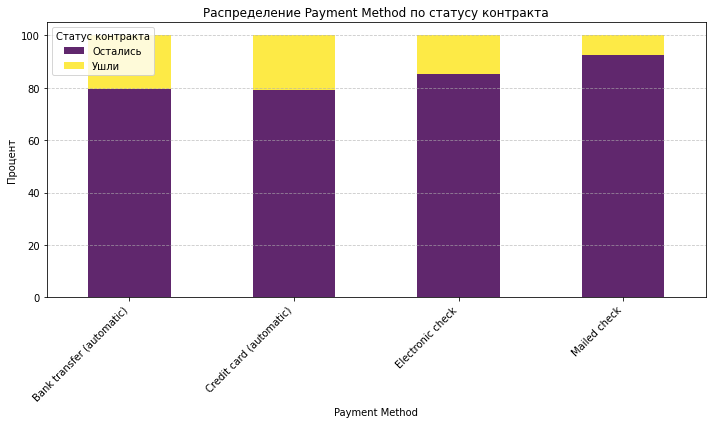

Сравнение для столбца: online_security


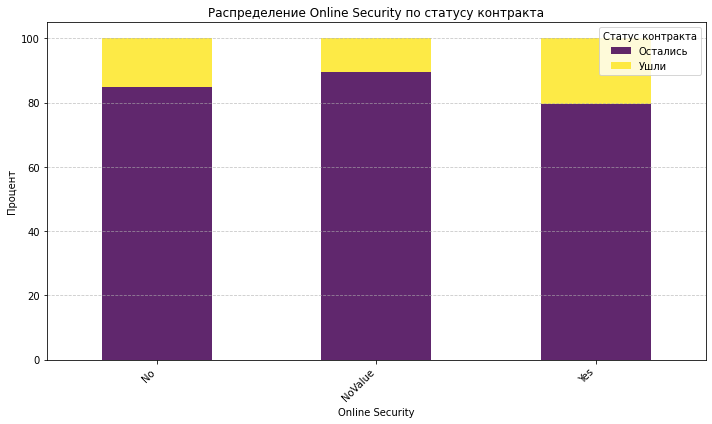

Сравнение для столбца: online_backup


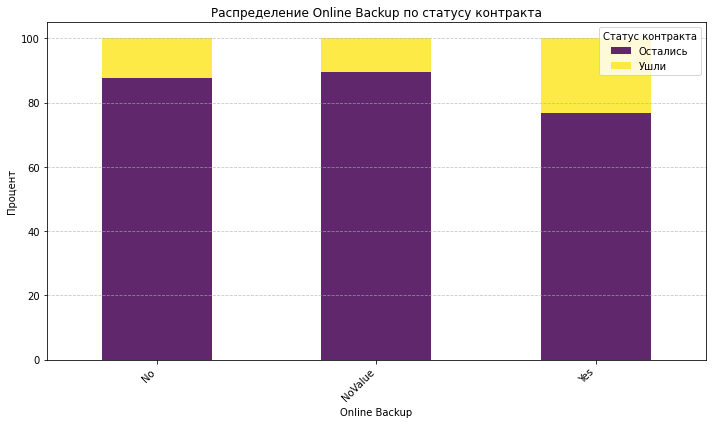

Сравнение для столбца: device_protection


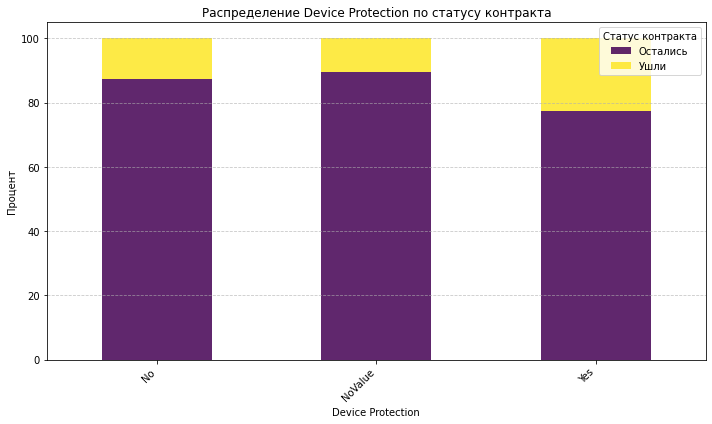

Сравнение для столбца: tech_support


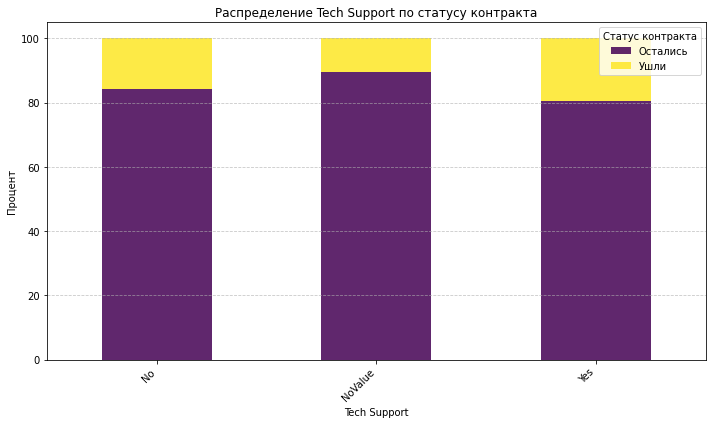

Сравнение для столбца: streaming_tv


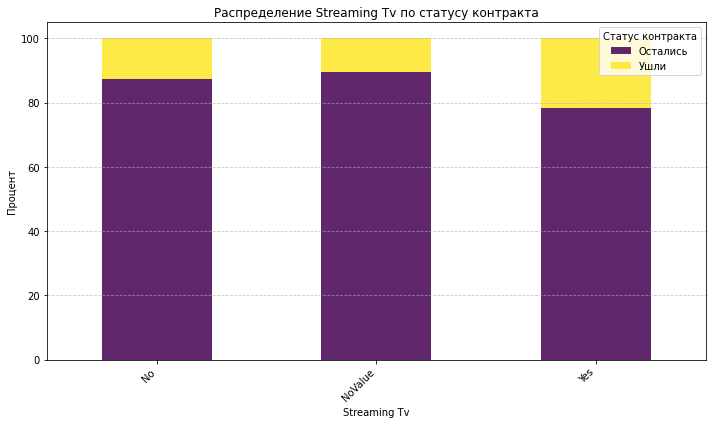

Сравнение для столбца: streaming_movies


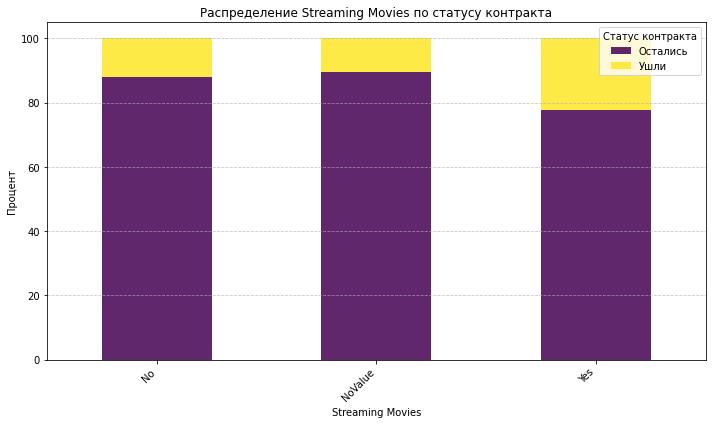

Сравнение для столбца: multiple_lines


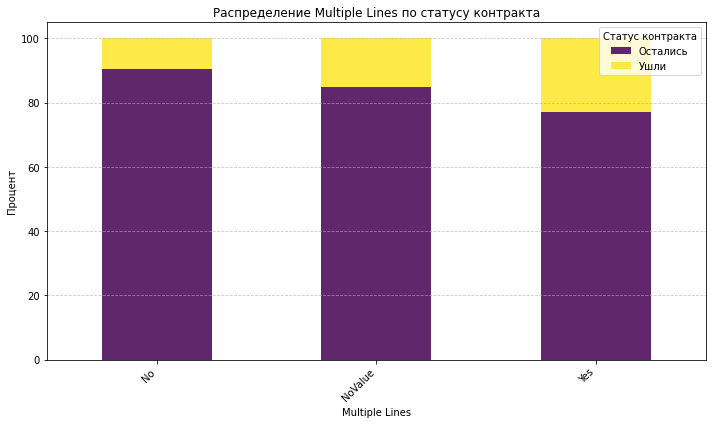

In [35]:
#Список столбцов
columns_to_compare = [
    'type', 'paperless_billing', 'payment_method', 
'online_security', 'online_backup', 'device_protection', 'tech_support', 
    'streaming_tv', 'streaming_movies', 'multiple_lines'
]

#Цикл для построения графиков
for column in columns_to_compare:
    print(f"Сравнение для столбца: {column}")
    compare_categorical(total_new, column)  # Вызов функции сравнения

- Пользователи без бумажных чеков уходят чуть чаще.
- Пользователи, получающие квитанцию об оплате по почте уходят реже всего.
- Пользователи, пользующиесь услугой Online Backup уходят значительно чаще. Могут быть проблемы с качеством услуги или, возможно, ее подключали пользователям, которые ей не пользовались (Ставили "бесплатно" при подключении как доп. услугу с оплатой с n'ного месяца и необходимостью отключать вручную. Популярная порочная практика провайдеров.
- То же касается Стриминга ТВ, фильмов.
- Выше всего отток у пользователей, пользующихся несколькими телефонными линиями. Далее пользователи совсем без телефонии. Среди пользователей с одной телефонной линией отток ниже всего.


### Выводы

- Доля ушедших клиентов составляет 84.37%, активных - 15.63%. Дисбаланс классов нужно будет учесть при обучении моделей.
- Есть сильная положительная корреляция между `monthly_charges` и `total_charges`.
- Целевая переменная `active_contract` отрицательно коррелирует с `duration_contract` и `total_charges`, что указывает на то, что длительные контракты и большие суммы платежей связаны с меньшей вероятностью оттока.
- Признаки `duration_contract`, `total_charges`, `monthly_charges` имеют слабую корреляцию с целевой переменной по phik.
- Категориальные признаки, такие как `partner`, `payment_method` и `multiple_lines` также показывают слабую корреляцию с оттоком клиентов.



- Клиенты с высокими ежемесячными платежами более склонны к оттоку. 
- Клиенты с низкими и средними платежами остаются с большей вероятностью.
- Доля ушедших клиентов резко уменьшается с увеличением total_charges.
- Отток распределен по длительности контрактов достаточно равномерно с пиком на 1000 дней.
- Пол не является значительным фактором оттока.
- Пользователи с партнерами уходят в 2 раза чаще, чем одинокие.
- Процент оттока пользовательей оптического интернета выше, чем у остальных. Стоит обратить внимание на проблемы с услугой.
- Процент оттока пользователей с иждевенцами незначительно выше.
- Пользователи без бумажных чеков уходят чуть чаще.
- Пользователи, получающие квитанцию об оплате по почте уходят реже всего.
- Пользователи, пользующиесь услугой Online Backup уходят значительно чаще. Могут быть проблемы с качеством услуги или, возможно, ее подключали пользователям, которые ей не пользовались (Ставили "бесплатно" при подключении как доп. услугу с оплатой с n'ного месяца и необходимостью отключать вручную. Популярная порочная практика провайдеров.
- То же касается Стриминга ТВ, фильмов.
- Выше всего отток у пользователей, пользующихся несколькими телефонными линиями. Далее пользователи совсем без телефонии. Среди пользователей с одной телефонной линией отток ниже всего.


## Подготовка и обучение моделей

### Разделение данных на обучающую и тестовую выборки

In [36]:
# Разделение данных на признаки и целевую переменную
features = total_new.drop(['customer_id', 'active_contract'], axis=1)
target = total_new['active_contract']

# Разделение на обучающую и тестовую выборки (75%/25%)
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=RANDOM_STATE, stratify=target
)

print('Размер обучающей выборки:', features_train.shape)
print('Размер тестовой выборки:', features_test.shape)


Размер обучающей выборки: (5282, 18)
Размер тестовой выборки: (1761, 18)


### Обработка дисбаланса классов

In [37]:
# Расчет весов классов
class_counts = target_train.value_counts()
class_weights = {
    0: class_counts[0] / len(target_train),
    1: class_counts[1] / len(target_train)
}
print('Вес класса 0:', class_weights[0])
print('Вес класса 1:', class_weights[1])

Вес класса 0: 0.8436198409693298
Вес класса 1: 0.1563801590306702


### Подготовка данных

Используем трансформер, чтобы подготовить данные для обучения

In [38]:
# Список числовых и категориальных признаков
numeric_features = ['monthly_charges', 'total_charges', 'duration_contract']
categorical_features = [col for col in features.columns if col not in numeric_features]


features_train = features_train[selected_features]
features_test = features_test[selected_features]

# Настройка кросс-валидации
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=RANDOM_STATE)

### Обучение моделей

#### Logistic Regression

In [39]:
# Модель LogisticRegression
preprocessor_lr = get_preprocessor('linear')
model_lr = Pipeline(steps=[
    ('preprocessor', preprocessor_lr),
    ('classifier', LogisticRegression(random_state=RANDOM_STATE, class_weight='balanced', max_iter=1000))
])

# Параметры для GridSearchCV
param_grid_lr = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__solver': ['liblinear', 'lbfgs', 'newton-cg']
}

grid_search_lr = GridSearchCV(model_lr, param_grid_lr, cv=cv, scoring='roc_auc', n_jobs=-1)
grid_search_lr.fit(features_train, target_train)

print('Лучшие параметры для LogisticRegression:', grid_search_lr.best_params_)
print('Лучший ROC AUC на обучающей выборке:', grid_search_lr.best_score_)


Лучшие параметры для LogisticRegression: {'classifier__C': 10, 'classifier__solver': 'newton-cg'}
Лучший ROC AUC на обучающей выборке: 0.77028459647803


#### RandomForest

In [40]:
# Модель RandomForestClassifier
preprocessor_rf = get_preprocessor('other')
model_rf = Pipeline(steps=[
    ('preprocessor', preprocessor_rf),
    ('classifier', RandomForestClassifier(random_state=RANDOM_STATE, class_weight='balanced'))
])

# Параметры для GridSearchCV
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [10, 20, 30],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__max_features': ['sqrt', 'log2']
}

# Инициализация GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=model_rf,
    param_grid=param_grid_rf,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

# Обучение модели с подбором гиперпараметров
grid_search_rf.fit(features_train, target_train)

# Вывод результатов
print('Лучшие параметры для RandomForestClassifier:', grid_search_rf.best_params_)
print('Лучший ROC AUC на обучающей выборке:', grid_search_rf.best_score_)


Fitting 4 folds for each of 162 candidates, totalling 648 fits
Лучшие параметры для RandomForestClassifier: {'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200}
Лучший ROC AUC на обучающей выборке: 0.8282878719634565


#### CatBoost

In [41]:
from sklearn.utils import class_weight

# Вычисление весов классов
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(target_train),
    y=target_train
)
class_weights_dict = dict(zip(np.unique(target_train), class_weights))
scale_pos_weight = class_weights_dict[0] / class_weights_dict[1]

# Модель CatBoostClassifier
preprocessor_cb = get_preprocessor('other')
model_cb = Pipeline(steps=[
    ('preprocessor', preprocessor_cb),
    ('classifier', CatBoostClassifier(random_state=RANDOM_STATE, silent=True))
])

# Параметры для GridSearchCV
param_grid_cb = {
    'classifier__iterations': [1000, 1500],
    'classifier__depth': [4, 6, 8],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__l2_leaf_reg': [1, 3, 5],
    'classifier__scale_pos_weight': [scale_pos_weight]
}

# Инициализация GridSearchCV
grid_search_cb = GridSearchCV(
    estimator=model_cb,
    param_grid=param_grid_cb,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

# Обучение модели с подбором гиперпараметров
grid_search_cb.fit(features_train, target_train)

# Вывод результатов
print('Лучшие параметры для CatBoostClassifier:', grid_search_cb.best_params_)
print('Лучший ROC AUC на обучающей выборке:', grid_search_cb.best_score_)


Fitting 4 folds for each of 54 candidates, totalling 216 fits
Лучшие параметры для CatBoostClassifier: {'classifier__depth': 4, 'classifier__iterations': 1500, 'classifier__l2_leaf_reg': 1, 'classifier__learning_rate': 0.1, 'classifier__scale_pos_weight': 0.18536804308797125}
Лучший ROC AUC на обучающей выборке: 0.9252428173873299


### Вывод

- **Логистическая регрессия** показала *ROC AUC* **0.77** на обучающей выборке. Это базовая модель с относительно низким качеством предсказания.
- **Случайный лес** улучшил качество до *ROC AUC* **0.828**, что свидетельствует о более высокой способности модели различать классы.
- **CatBoostClassifier** продемонстрировала наилучшее качество с *ROC AUC* **0.925** на обучающей выборке. Это говорит о высоком потенциале модели для прогнозирования оттока клиентов.

На основании результатов кросс-валидации, модель CatBoostClassifier с гиперпараметрами:
-    `classifier__depth`: 4,
-    `classifier__iterations`: 1500,
-    `classifier__l2_leaf_reg`: 1,
-    `classifier__learning_rate`: 0.1,
-    `classifier__scale_pos_weight`: 0.185
была выбрана для дальнейшего тестирования на тестовой выборке.

## Тестирование лучшей модели
Проверим модель CatBoost на тестовой выборке и изучим ее.

### Проверим целевые метрики

In [42]:
# Используем лучшую модель, найденную GridSearchCV
final_model_cb = grid_search_cb.best_estimator_

# Предсказываем вероятности и метки классов для тестового набора
y_test_proba_cb = final_model_cb.predict_proba(features_test)[:, 1]
y_test_pred_cb = final_model_cb.predict(features_test)

# Вычисляем ROC AUC и accuracy на тестовой выборке
test_roc_auc_cb = roc_auc_score(target_test, y_test_proba_cb)
test_accuracy_cb = accuracy_score(target_test, y_test_pred_cb)

print('ROC AUC на тестовой выборке:', test_roc_auc_cb)
print('Accuracy на тестовой выборке:', test_accuracy_cb)


ROC AUC на тестовой выборке: 0.9341686039398017
Accuracy на тестовой выборке: 0.9244747302668939


### Изучим матрицу ошибок

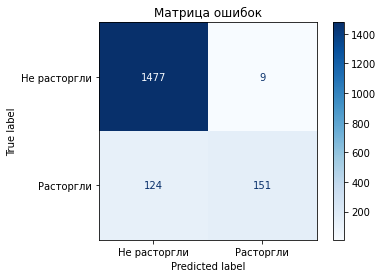

In [43]:
# Матрица ошибок
cm = confusion_matrix(target_test, y_test_pred_cb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Не расторгли', 'Расторгли'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Матрица ошибок')
plt.show()

### Определим важность признаков

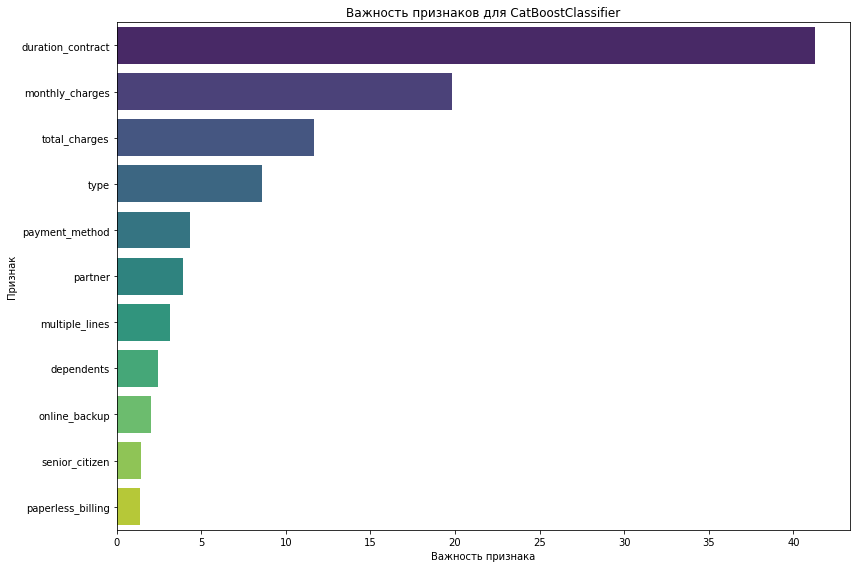

In [44]:
# Анализ важности признаков
importances = final_model_cb.named_steps['classifier'].feature_importances_
preprocessor = final_model_cb.named_steps['preprocessor']
cat_features = preprocessor.transformers_[1][2]
num_features = preprocessor.transformers_[0][2]
feature_names = num_features + cat_features

feature_importance = pd.Series(importances, index=feature_names)
feature_importance = feature_importance.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.title('Важность признаков для CatBoostClassifier')
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.tight_layout()
plt.show()


-  Самый значимый признак - `duration_contract` (41.26%). Отрицательная корреляция говорит о том, что в первую очередь нужно обращать внимание на новых пользователей.
- `monthly_charges` (19.82%) и `total_charges` (11.64%) так достаточно значимы. Клиенты с высокими ежемесячными платежами  чаще уходят, что указывает на возможную чувствительность к стоимости услуг.
- Тип контракта `type` (8.60%) и способ оплаты `payment_method` (4.31%) так же оказывают влияние на отток, что может быть связано с удобством и гибкостью предлагаемых условий.


### Вывод
**CatBoost** с гиперпараметрами:
-    `classifier__depth`: 4,
-    `classifier__iterations`: 1500,
-    `classifier__l2_leaf_reg`: 1,
-    `classifier__learning_rate`: 0.1,
-    `classifier__scale_pos_weight`: 0.185

успешно справилась с поставленной задачей, продемонстрировав высокие *ROC-AUC* (**0.93**) и *Accuracy* (**0.92**) на тестовой выборке.

Был проведен анализ важности признаков. Вот топ-5 наиболее важных признаков:
- `duration_contract` (**41.26**%)
- `monthly_charges` (**19.82**%)
- `total_charges` (**11.64**%)
- `type` (**8.60**%)
- `payment_method` (**4.31**%)


## Выводы

**Подготовка** 
- Были загружены и изучены данные о пользователях из четырех таблиц
- Объявлены вспомогательные функции

**Обработка данных** 
- Привели названия столбцов к нижнему регистру
- Привели данные к нужному типу
- Обработали пропуски корректными и маркерными значениями
- Создали целевой признак `active_contract`
- Создали признак `duration_contract`
- Объединили данные в общую таблицу

**Исследовательский анализ данных**
- Проведен анализ распределения целевой переменной. Обнаружен сильный дисбаланс классов
- Выполнен корреляционный анализ, в результате для избежания мультиколлинеарности были отобраны признаки для обучения
- Проведено сравнение характеристик ушедших и оставшихся клиентов. 

**Подготовка и обучение моделей**
- Обучены три модели — **Logistic Regression**, **RandomForestClassifier** и **CatBoostClassifier**. 
- **Регрессия** показала *ROC-AUC* = **0.77** на обучающей выборке
- **Случайный** лес показал  *ROC-AUC* = **0.82** на обучающей выборке
- **CatBoost**  *ROC-AUC* = **0.91** на обучающей выборке 

**Тестирование лучшей модели**
- Модель **CatBoost** с гиперпраметрами
-    `classifier__depth`: 4,
-    `classifier__iterations`: 1500,
-    `classifier__l2_leaf_reg`: 1,
-    `classifier__learning_rate`: 0.1,
-    `classifier__scale_pos_weight`: 0.185
показала  *ROC AUC* = **0.93** на тестовой выборке, удовлетворяя требованиям проекта.


**Рекомендации для бизнеса**:
- Удержание клиентов с короткими контрактами

Длительность контракта (`duration_contract`) является наиболее значимым фактором оттока. Клиенты с более короткими контрактами склонны чаще уходить. Рекомендуется предлагать клиентам с месячными и краткосрочными контрактами выгодные условия для продления, внедрить бонусные программы или скидки для тех, кто переходит на долгосрочные контракты, проводить персонализированные акции для клиентов на стадии принятия решения о продлении.


- Пересмотр тарифов для клиентов с высокими ежемесячными платежами

Клиенты с высокими ежемесячными платежами (`monthly_charges`) чаще уходят, что указывает на возможную чувствительность к стоимости услуг. Рекомендуется провести анализ конкурентоспособности тарифов, определить, не завышены ли цены по сравнению с рынком, убедиться в том, что пользователи сознательно подключают услуги `online_security`, `online_backup`, `device_protection`, `tech_support`, `streaming_t_v` и `streaming_movies`, провести исследование качества этих услуг.


- Проверка качества оптоволоконного интернета

Пользователи оптоволоконного интернета имеют более высокий процент оттока. Рекомендуется провести технический аудит качества услуг оптоволоконного интернета, улучшить обратную связь с клиентами для выявления конкретных проблем и оперативного их решения.


- Оптимизация способов оплаты и предоставления счетов

Те, кто получают квитанции по почте, реже расторгают договор. Рекомендуется изучить и улучшить удобство и информативность электронных счетов.

- Работа с клиентами, имеющими партнеров и иждивенцев

Пользователи с партнерами и иждивенцами уходят чаще. Рекомендуется изучить возможность разработки семейных тарифов или специальных предложений для семей (скидки на дополнительные услуги при подключении нескольких пользователей из одной семьи, семейные программы лояльности). 

- Анализ использования телефонных услуг

Отток выше среди пользователей с несколькими телефонными линиями. Рекомендуется провести анализ конкурентоспособности тарифов, провести техничечский аудит услуги нескольких телефонных линий.

Внедрение модели позволит с высокой точностью предсказывать и обрабатывать отток клиентов.